In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data from csv into a pandas dataframe
telco_df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
# Head function belongs to the dataframe object and shows the first 5 rows by default
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# info function displays the data types of the columns and whether there are any null (missing) values
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# describe function gives summary statistics of the numeric fields
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


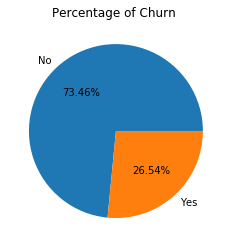

In [6]:
# Here we check distribution of yes and no in churn column

churn_counts = telco_df['Churn'].value_counts()

plt.pie(churn_counts, autopct = '%1.2f%%', labels=telco_df.Churn.unique())
plt.title('Percentage of Churn ')
plt.show()

In [7]:
# as seen below, number of customers who churned is approximately 26.5%
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# Drop irrelevant data.

telco_df.drop('customerID', axis=1, inplace=True)

In [26]:
# set up target variable in y and drop the target column from data frame
y = telco_df['Churn']
telco_df.drop('Churn', axis=1, inplace=True)

In [27]:
#convert all columns to string # Does not work
#all_columns = list(telco_df)
#telco_df[all_columns] = telco_df[all_columns].astype(str)
#telco_df.drop('TotalCharges', axis=1, inplace=True)

In [91]:
telco_df.dtypes

gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
tenure               float64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges        float128
dtype: object

In [29]:
# Turn the numeric columns in float 
telco_df['SeniorCitizen']=telco_df['SeniorCitizen'].astype('float64')
telco_df['tenure']=telco_df['tenure'].astype('float64')
telco_df['MonthlyCharges']=telco_df['MonthlyCharges'].astype('float64')
telco_df['TotalCharges']=telco_df['TotalCharges'].astype('float128')

In [14]:
telco_df['TotalCharges'].value_counts()

0.00       11
20.20      11
19.75       9
19.90       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
#telco_df['TotalCharges']=telco_df['TotalCharges'].astype('float')

In [30]:
telco_df.dtypes

gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
tenure               float64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges        float128
dtype: object

In [16]:
# describe now returns summary statistics for all 4 numeric columns
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
#telco_df[cat_attribs]=telco_df[cat_attribs].astype(str)

In [24]:
#telco_df.dtypes

gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
tenure               float64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges        float128
Churn                 object
dtype: object

In [33]:
# Create a list of numeric attributes
num_attribs = list(telco_df.select_dtypes(include=np.number).columns)

In [34]:
# create a list of categorial attributes
cat_attribs = list(telco_df.select_dtypes(exclude=np.number).columns)

In [35]:
# import required data transformation and set up column transformer object
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

col_transformer = ColumnTransformer([('num',StandardScaler(),num_attribs),('cat',OrdinalEncoder(),cat_attribs)])


In [36]:
# The transformed data is now saved in a new data frame
telco_df_trans = col_transformer.fit_transform(telco_df)

In [37]:
# the tranformed data still has 7043 rows and 19 features
telco_df_trans.shape

(7043, 19)

In [94]:
# Notice the shape of transformed set matches that of the original data set
telco_df.shape

(7043, 19)

In [39]:
# Lets use label encoder to encode the target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [40]:
y = label_encoder.fit_transform(y)

In [41]:
# y is now an array containing 0 and 1
y

array([0, 0, 1, ..., 0, 1, 0])

In [43]:
# 0 represent No, 1 represents Yes
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [44]:
# y contains 7043 values i.e 1 value of each vector in X
y.shape

(7043,)

In [45]:
# X is out data matrix
X = telco_df_trans

In [47]:
# We will perform 10 fold cross validation using DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc_results = cross_val_score(dtc,X,y,cv=10,scoring='accuracy')

print (dtc_results.mean(), '+/-',dtc_results.std())



0.7337805233717887 +/- 0.01583007825771066


In [49]:
# We will perform 10 fold cross validation using LogisticRegression


from sklearn.linear_model import LogisticRegressionCV

lrc = LogisticRegressionCV()

lrc_results = cross_val_score(lrc,X,y,scoring='accuracy')

print (lrc_results.mean(), '+/-',lrc_results.std())



/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 

0.8026412347053653 +/- 0.0016050913512672686


In [50]:
# We will perform 10 fold cross validation using KNeighborsClassifier


from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc_results = cross_val_score(knc,X,y,scoring='accuracy')

print (knc_results.mean(), '+/-',knc_results.std())



/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.756780376412964 +/- 0.0029635386176206212


In [51]:
# We will perform 10 fold cross validation using GaussianNB


from sklearn.naive_bayes import GaussianNB

gnbc = GaussianNB()

gnbc_results = cross_val_score(gnbc,X,y,scoring='accuracy')

print (gnbc_results.mean(), '+/-', gnbc_results.std())

0.7519532710212538 +/- 0.005115625498007431


/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [67]:
# Lets build ROC curve for Logistic Regression

# In order to build ROC curve, there is a class roc_curve. 
# roc_curve class though requires y (actual values) and predicted probabilities'
# Therefore we use cross_val_predicit below
# cross_val_predict returns the predicted probability of belonging to class
# decision function below returns the confidence of predicition. 
# confidence is the signed distance from separating hyperplane.

from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(lrc, X, y, method='decision_function',cv=10) # cv= 10 for 10 fold cross val and method='decision_function' ensures confidence values are returned

#y_scores = cross_val_predict(lrc, X, y,cv=10)





/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 

In [68]:
# Next, we build the roc curve

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y,y_scores)

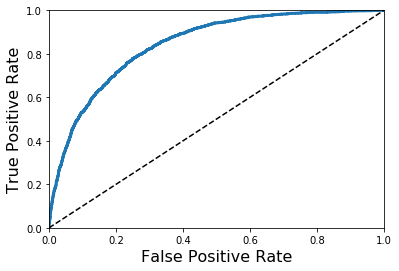

<Figure size 720x432 with 0 Axes>

In [69]:
# Use matplot to plot the graph

plt.plot(fpr, tpr, linewidth=3, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()

In [62]:
# Lets also compute the AUC 

from sklearn.metrics import roc_auc_score

print (roc_auc_score(y,y_scores))



0.8434336869349007


In [79]:
# ROC Curve for KNN and Naive Bayes
# Note predict_proba returns the probability of both Yes and No

y_score_knn = cross_val_predict(knc,X,y,method='predict_proba',cv=10)

y_score_gnb = cross_val_predict(gnbc,X,y,method='predict_proba',cv=10)




In [74]:
# Shape of y 
y.shape

(7043,)

In [78]:
# Because predict_proba returns probabiliy of yes and no, we need only probability of Yes which is in 2nd column 
# index of 2nd column is 1

y_score_gnb[:,1].shape

(7043,)

In [82]:
y_score_knn[:,1].shape

(7043,)

In [85]:
# Compute the values for y and x axis for different thresholds

fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y,y_score_gnb[:,1])

fpr_knn, tpr_knn, threshold_knn = roc_curve(y,y_score_knn[:,1])




<function matplotlib.pyplot.show(*args, **kw)>

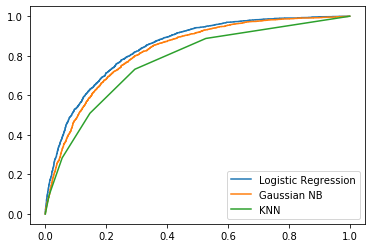

In [87]:
# Use matplotlib to plot all 3 graphs

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_gnb, tpr_gnb,label='Gaussian NB')
plt.plot(fpr_knn, tpr_knn,label='KNN')
plt.legend()
plt.show

In [90]:
# Compute the Area Under Curve for all 3 classifiers

print (roc_auc_score(y,y_scores))
print (roc_auc_score(y,y_score_gnb[:,1]))
print (roc_auc_score(y,y_score_knn[:,1]))

0.8434336869349007
0.8232791007761364
0.7712824835375793


In [95]:
# Earlier we used decision_function with logisitic regression
# we can also use predict_proba to get probability instead of distance from hyperplane

y_scores_lr = cross_val_predict(lrc, X, y, method='predict_proba',cv=10)



/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 

In [96]:
# scores returned now have 2 values column 0 - probability of No, column 1 - probability of yes
y_scores_lr

array([[0.44296331, 0.55703669],
       [0.94901608, 0.05098392],
       [0.68387621, 0.31612379],
       ...,
       [0.61645955, 0.38354045],
       [0.23913047, 0.76086953],
       [0.95441618, 0.04558382]])

In [97]:
# y_scores on the other hand contains on 1 row
y_scores

array([ 0.22914415, -2.92391541, -0.77164305, ..., -0.4745476 ,
        1.15745261, -3.0415471 ])

In [99]:
# Lets calculate the fpr, tpr using y_scores_lr.
# We will only use the probability of yes which is the 2nd column in y_scores_lr
fpr_lr, tpr_lr, threshold = roc_curve(y,y_scores_lr[:,1])

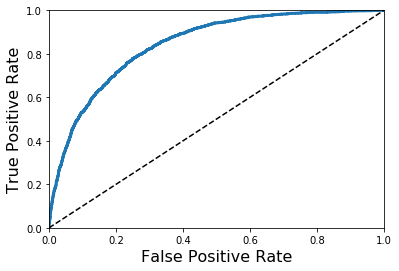

<Figure size 720x432 with 0 Axes>

In [103]:
# Plot the ROC curve using tpr and fpr calcuated using predict_proba
plt.plot(fpr_lr, tpr_lr, linewidth=3, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()

In [102]:
# The Area under curve (AUC) remains unchanged inspite of using probabilities instead of confidence

print (roc_auc_score(y,y_scores_lr[:,1]))

0.8434336869349007
